# Metropolitan Crime Rate Predictor

This is a simple approach to study the given metropolitan data and predict the crime rate for using **DecisionTreeRegressor** and **LinearRegression**. Later evaluate the metrics of both methods and see which suits our applicaiton better

### References

1. https://learn.dphi.tech/
    Being a part of this bootcamp guided me to this wonderful transition
   
### Purpose
The purpose of this notebook is to establish a good practice of different methods available in pandas, matplotlib, seaborn and oter such libraries. So there might be some over redundant plots or tabulations which are just to establish the learnings. 

### Load libraries needed

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Study data

In [36]:
# metroData = pd.read_csv('Standard Metropolitan Areas Data - train_data - data.csv')
metroData = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Standard_Metropolitan_Areas_Data-data.csv')
#displays 'n' random rows from our dataset
metroData.sample(5)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
93,4552,54.4,9.1,329,719,61.9,118.0,1386,4,62.63
39,1490,33.1,11.9,827,3818,47.4,300.2,4144,1,30.59
87,7397,47.3,12.5,355,2042,56.2,113.7,1654,2,45.97
77,1526,71.7,7.7,413,1636,47.1,125.8,1692,3,66.13
11,1519,31.8,10.5,4094,12545,54.6,906.0,14684,2,52.73


In [37]:
#copy source dataframe into another working dataframe
data = metroData.copy()
#gather some informaation about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
land_area         99 non-null int64
percent_city      99 non-null float64
percent_senior    99 non-null float64
physicians        99 non-null int64
hospital_beds     99 non-null int64
graduates         99 non-null float64
work_force        99 non-null float64
income            99 non-null int64
region            99 non-null int64
crime_rate        99 non-null float64
dtypes: float64(5), int64(5)
memory usage: 7.8 KB


Looks like there is no missing values. Also by taking a glance at the sample data, we can say that all the features are continuous. But for the region even though its a continuous number we could later convert them using one hot encoding before we feed into our model

Let us see some statistical insights of our data

In [38]:
data.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643030
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.470943
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.320000
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.115000
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.060000
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.860000
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.620000


We notice there are some outliers with huge gap as in the case with **land_area, physicians, hospital_beds, workforce and income**.
Lets see how they are currently correlated

### Exploratory Data Analysis

In [39]:
sns.set_context('poster')
sns.set(font_scale=1)
# sns.pairplot(data,kind='reg',diag_kind='kde')

Text(0.5, 0.98, 'Heatmap - NonLinear')

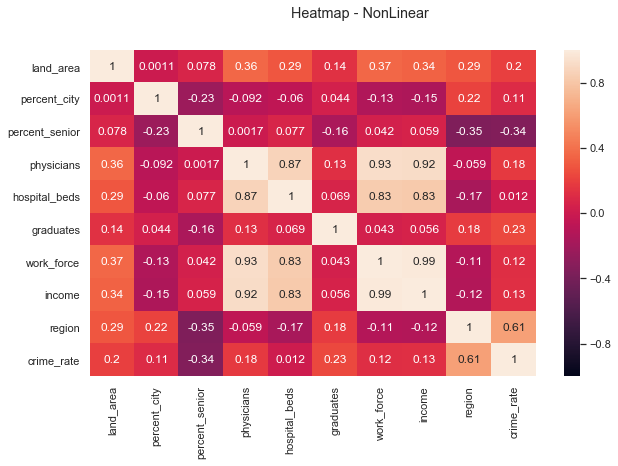

In [40]:
#here correlation method 'spearman' gives a non linear realtion
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(method='spearman'),annot=True,vmax=1,vmin=-1)
plt.suptitle('Heatmap - NonLinear')

Text(0.5, 0.98, 'Heatmap - Linear')

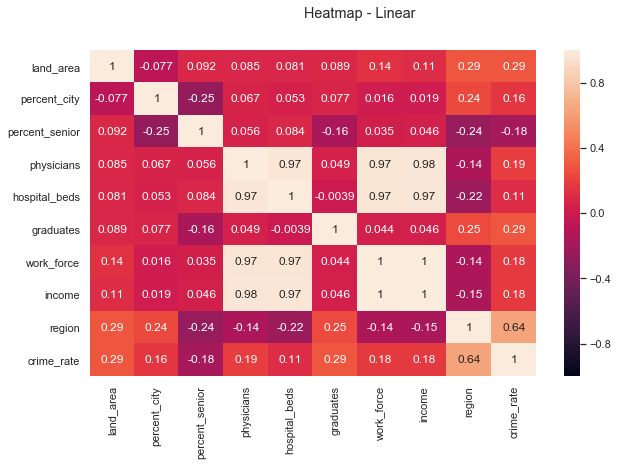

In [41]:
#here correlation method 'pearson',which is the default, gives a non linear realtion
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(method='pearson'),annot=True,vmax=1,vmin=-1)
plt.suptitle('Heatmap - Linear')

In both cases we notice there is **positive correlation** with **region, graduates** and **negative correlation** with *percent_senior** (more clearly shown in the spearman method of correlation)

The reason why crime rate is correlated with graduates is intriguing


Text(0.5, 0.98, 'Graduates distribution')

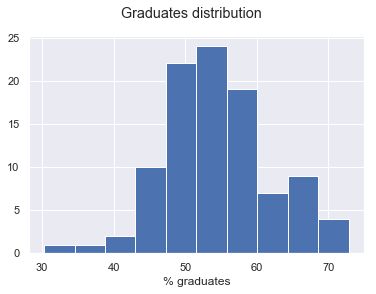

In [42]:
data.graduates.hist()
plt.xlabel('% graduates')
plt.suptitle('Graduates distribution')

We can see that majority of graduates percent is between **50%-60%**. We could bin this continuous data to get a better understanding of the correlation with crime_rate

In [43]:
def binConverter(featureList,n):
    for k in featureList:
        diff = data[k].max()-data[k].min()
        cRange=diff/float(n)
        l = data[k].min()
        llim = l
        ulim = llim+cRange
        newName=k+'_band'
        data[newName]=0
        for i in range(10):
            data.loc[((data[k]>=llim)&(data[k]<ulim)),newName]=i
            llim=ulim
            ulim+=cRange

binConverter(['graduates'],9)

#We could bin crime_rate, which is a continuous data to get a better understanding of the spread over with regio
binConverter(['crime_rate'],7) 

data.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate,graduates_band,crime_rate_band
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55,4,5
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03,4,3
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32,4,2
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38,4,4
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19,7,6


In [44]:
#Let us check how the crimerate is spread over regions
pd.crosstab([data.region],[data.crime_rate_band],margins=True).style.background_gradient(cmap='summer_r')

crime_rate_band,0,1,2,3,4,5,6,7,All
region,,,,,,,,,
1,6,5,5,4,0,1,0,0,21
2,0,1,8,9,6,1,0,0,25
3,0,2,6,10,11,7,0,0,36
4,0,0,0,3,6,2,5,1,17
All,6,8,19,26,23,11,5,1,99


**Region 4 has less number of crimes but their crime rates are in the higher limits. Region 3 though having almost twice as many crimes still manages to have a lesser overall crime rate. This gets interesting and lets see how the graduates are distribute across regions.** 

In [45]:
pd.crosstab([data.region],[data.graduates_band],margins=True).style.background_gradient(cmap='summer_r')

graduates_band,0,1,2,3,4,5,6,7,8,All
region,,,,,,,,,,
1,0,1,3,2,5,9,1,0,0,21
2,0,0,0,2,6,9,5,2,1,25
3,1,1,1,9,13,8,1,0,2,36
4,0,0,0,0,4,1,3,6,3,17
All,1,2,4,13,28,27,10,8,6,99


Again an interesting thing to note here is, **Region 4 has the most high % of graduates**. This made us think, more graduates means more income in region, and hence higher crime rate, **hold it just there**

Text(0.5, 0.98, 'Region vs Income Median')

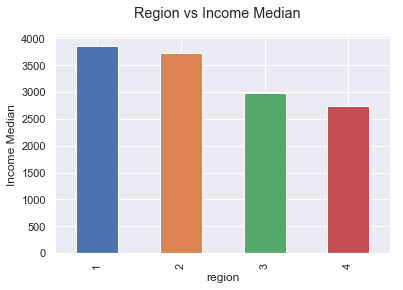

In [46]:
data.groupby('region')['income'].median().plot.bar()
plt.ylabel('Income Median')
plt.suptitle('Region vs Income Median')

**Region 4 which has highest graduate percentage and crime rate has the lowest median income**. Which does not seem to fit any real life rationale. So the only conclusion we could arrive regarding this data is it was synthetically created and hence this irrationalism.

We noticed a negative correlation between crime_rate and percent_senior. So lets see with little more detail how they stack up

In [47]:
binConverter(['percent_city'],9)
binConverter(['percent_senior'],6)

Text(0.5, 1.0, '% senior citizen vs crime rate')

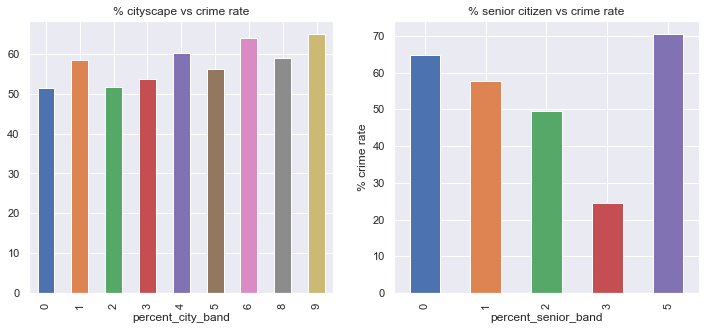

In [48]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
plt.ylabel('% crime rate')
data.groupby('percent_city_band')['crime_rate'].median().plot.bar(ax=ax[0])
ax[0].set_title('% cityscape vs crime rate')
data.groupby('percent_senior_band')['crime_rate'].median().plot.bar(ax=ax[1])
ax[1].set_title('% senior citizen vs crime rate')

In [49]:
pd.crosstab([data.percent_senior_band],[data.percent_city_band],margins=True).style.background_gradient(cmap='summer_r')

percent_city_band,0,1,2,3,4,5,6,8,9,All
percent_senior_band,,,,,,,,,,
0,0,4,0,1,1,1,1,1,1,10
1,4,8,7,12,4,7,2,0,0,44
2,7,7,13,6,7,0,1,0,0,41
3,0,2,0,0,0,0,0,0,0,2
5,1,0,1,0,0,0,0,0,0,2
All,12,21,21,19,12,8,4,1,1,99


It is seen from this that the **seniors preferred to stay in rural areas**. And we also notice a **increase in crime rate with more city space**. This explains the **negative corelation between percent_senior and crime_rate**

### One Hot Encoding
Let us ohe the **region** feature like we discussed earlier.

In [50]:
featuresToConv = ['region']
data=pd.get_dummies(data,columns=featuresToConv)

In [51]:
data.columns

Index(['land_area', 'percent_city', 'percent_senior', 'physicians',
       'hospital_beds', 'graduates', 'work_force', 'income', 'crime_rate',
       'graduates_band', 'crime_rate_band', 'percent_city_band',
       'percent_senior_band', 'region_1', 'region_2', 'region_3', 'region_4'],
      dtype='object')

### Model Preparation

Text(0.5, 0.98, 'Heatmap - NonLinear')

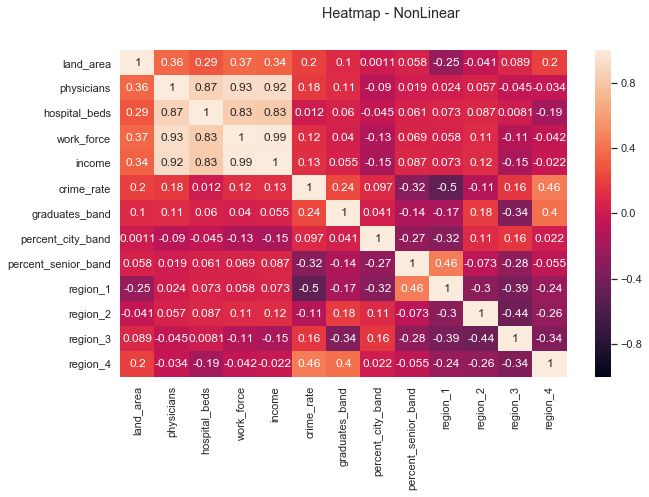

In [57]:
#we can remove the features that we have already converted into a band based features
featuresTodrop = ['percent_city','percent_senior','graduates','crime_rate_band']
data.drop(featuresTodrop,axis=1,inplace=True)
data.columns

#let us visually view how the data now correlates amongst themselves
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(method='spearman'),annot=True,vmax=1,vmin=-1)
plt.suptitle('Heatmap - NonLinear')

In [88]:
#let us prepare the dataset into a form suitable for our model
X = data.drop(['hospital_beds','percent_city_band','crime_rate'],axis=1)
y = data['crime_rate']

### DecisionTreeRegressor

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#split the training and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

#create an object for the DTR and 
treeModel = DecisionTreeRegressor(max_depth=4)
#pass the input parameters to fit the data
treeModel.fit(X_train,y_train)

#predict the values using the model we have created
pred_train = treeModel.predict(X_train)
pred_test = treeModel.predict(X_test)

In [2]:
from sklearn import metrics
#run the following metrics to evaluate our model's accuracy

MSE = metrics.mean_squared_error(y_test,pred_test)
RMSE =np.sqrt(metrics.mean_absolute_error(y_test, pred_test))
R2 = metrics.r2_score(y_test,pred_test)
res = [MSE,RMSE,R2]
# print('MSE_train: ',metrics.mean_squared_error(y_train,pred_train))
print('MSE_test: ',metrics.mean_squared_error(y_test,pred_test))
# print('R2_train: ',metrics.r2_score(y_train,pred_train))
print('R2_test: ',metrics.r2_score(y_test,pred_test))
# print('RMSE_train: ',np.sqrt(metrics.mean_absolute_error(y_train, pred_train)))
print('RMSE_test: ',np.sqrt(metrics.mean_absolute_error(y_test, pred_test)))
result = pd.DataFrame(data=res,columns=['DecisionTreeRegressor'],index=['MSE','RMSE','R2'])

NameError: name 'y_test' is not defined

In [91]:
#later can use to display the decision tree
# from sklearn.tree import export_graphviz
# import graphviz

# # generate the graph for the tree
# dot_data= export_graphviz(treeModel, out_file='crime_rate_model.dot', 
#                           feature_names=X_test.columns,  
#                           class_names=['Low', 'High'],
#                           filled=True, rounded=True,  
#                           special_characters=True)

In [1]:
# with open("crime_rate_model.dot") as f:

#   dot_graph = f.read()
# graphviz.Source(dot_graph)

### Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

linFit = LinearRegression(normalize=True)
linFit.fit(X_train,y_train)
pred_train_LR = linFit.predict(X_train)
pred_test_LR = linFit.predict(X_test)

MSE1 = metrics.mean_squared_error(y_test,pred_test_LR)
RMSE1 =np.sqrt(metrics.mean_absolute_error(y_test, pred_test_LR))
R21 = metrics.r2_score(y_test,pred_test_LR)
res = [MSE1,RMSE1,R21]
result['Linear regression']=[MSE1,RMSE1,R21]

print('MSE_train: ',metrics.mean_squared_error(y_train,pred_train_LR))
print('MSE_test: ',metrics.mean_squared_error(y_test,pred_test_LR))
print('R2_train: ',metrics.r2_score(y_train,pred_train_LR))
print('R2_test: ',metrics.r2_score(y_test,pred_test_LR))
print('RMSE_train: ',np.sqrt(metrics.mean_absolute_error(y_train, pred_train_LR)))
print('RMSE_test: ',np.sqrt(metrics.mean_absolute_error(y_test, pred_test_LR)))

MSE_train:  97.44742533581578
MSE_test:  68.75945812503129
R2_train:  0.5590013372747595
R2_test:  0.17127749776969858
RMSE_train:  2.894001095659099
RMSE_test:  2.6726752116287096


In [94]:
result

,DecisionTreeRegressor,Linear regression
MSE,91.189037,68.759458
RMSE,2.735880,2.672675
R2,-0.099055,0.171277


In our case without much optimization we notice Linear Regression gives us better predications than DecisionTreeRegressor. With more data we will be able to better predic the data and understand the dynamics much more.